# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [183]:

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

---
## 2. Load data

In [184]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [185]:
df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.000009,2.225451e-06,1.802667e-08,0.014939,0.005682,0.000299,0.014948,5.684001e-03,2.987132e-04,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0


---

## 3. Feature engineering

### Difference between off-peak, peak and mid-peak prices in December and preceding January

In [186]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [187]:
# Group off-peak prices by companiy ids and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg(
    {'price_off_peak_var': 'mean', 
     'price_off_peak_fix': 'mean',
     'price_peak_var': 'mean',
     'price_peak_fix': 'mean',
     'price_mid_peak_var': 'mean',
     'price_mid_peak_fix': 'mean'}).reset_index()

monthly_price_by_id

,id,price_date,price_off_peak_var,price_off_peak_fix,price_peak_var,price_peak_fix,price_mid_peak_var,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969,0.103975,24.339581,0.070232,16.226389
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,40.565969,0.103975,24.339581,0.070232,16.226389
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,40.728885,0.105842,24.437330,0.073773,16.291555
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,40.728885,0.105842,24.437330,0.073773,16.291555
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,40.728885,0.105842,24.437330,0.073773,16.291555
...,...,...,...,...,...,...,...,...
192997,ffff7fa066f1fb305ae285bb03bf325a,2015-08-01,0.119916,40.728885,0.102232,24.437330,0.076257,16.291555
192998,ffff7fa066f1fb305ae285bb03bf325a,2015-09-01,0.119916,40.728885,0.102232,24.437330,0.076257,16.291555
192999,ffff7fa066f1fb305ae285bb03bf325a,2015-10-01,0.119916,40.728885,0.102232,24.437330,0.076257,16.291555
193000,ffff7fa066f1fb305ae285bb03bf325a,2015-11-01,0.119916,40.728885,0.102232,24.437330,0.076257,16.291555


In [188]:
# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Rename to prepare for merging 
dec_prices.columns = ['id', 'price_date', 'dec_off_peak_energy', 'dec_off_peak_power', 'dec_peak_energy', 'dec_peak_power',
                      'dec_mid_peak_energy', 'dec_mid_peak_power']

jan_prices.columns = ['id', 'price_date', 'jan_off_peak_energy', 'jan_off_peak_power', 'jan_peak_energy', 'jan_peak_power',
                      'jan_mid_peak_energy', 'jan_mid_peak_power']

jan_prices.drop(columns = 'price_date', inplace= True)

In [189]:
dec_prices.head()

,id,price_date,dec_off_peak_energy,dec_off_peak_power,dec_peak_energy,dec_peak_power,dec_mid_peak_energy,dec_mid_peak_power
0,0002203ffbb812588b632b9e628cc38d,2015-12-01,0.119906,40.728885,0.101673,24.43733,0.073719,16.291555
1,0004351ebdd665e6ee664792efc4fd13,2015-12-01,0.143943,44.444710,0.000000,0.00000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-12-01,0.201280,45.944710,0.000000,0.00000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,2015-12-01,0.113068,40.728885,0.095385,24.43733,0.069409,16.291555
4,00114d74e963e47177db89bc70108537,2015-12-01,0.145440,44.266930,0.000000,0.00000,0.000000,0.000000


In [190]:
jan_prices.head()

,id,jan_off_peak_energy,jan_off_peak_power,jan_peak_energy,jan_peak_power,jan_mid_peak_energy,jan_mid_peak_power
0,0002203ffbb812588b632b9e628cc38d,0.126098,40.565969,0.103975,24.339581,0.070232,16.226389
1,0004351ebdd665e6ee664792efc4fd13,0.148047,44.266931,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.150837,44.444710,0.000000,0.000000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.123086,40.565969,0.100505,24.339581,0.068646,16.226389
4,00114d74e963e47177db89bc70108537,0.149434,44.266931,0.000000,0.000000,0.000000,0.000000


In [191]:
# Merge the 2 dataframes
dec_jan_diff = pd.merge(dec_prices, jan_prices, on = 'id')

# Calculate the difference between Jan and Dec
dec_jan_diff['diff_off_peak_dec_jan_energy'] = dec_jan_diff['dec_off_peak_energy'] - dec_jan_diff['jan_off_peak_energy']
dec_jan_diff['diff_off_peak_dec_jan_power'] = dec_jan_diff['dec_off_peak_power'] - dec_jan_diff['jan_off_peak_power']
dec_jan_diff['diff_peak_dec_jan_energy'] = dec_jan_diff['dec_peak_energy'] - dec_jan_diff['jan_peak_energy']
dec_jan_diff['diff_peak_dec_jan_power'] = dec_jan_diff['dec_peak_power'] - dec_jan_diff['jan_peak_power']
dec_jan_diff['diff_mid_peak_dec_jan_energy'] = dec_jan_diff['dec_mid_peak_energy'] - dec_jan_diff['jan_mid_peak_energy']
dec_jan_diff['diff_mid_peak_dec_jan_power'] = dec_jan_diff['dec_mid_peak_power'] - dec_jan_diff['jan_mid_peak_power']

# Drop unncessary columns
dec_jan_diff = dec_jan_diff[['id', 'diff_off_peak_dec_jan_energy', 'diff_off_peak_dec_jan_power', 'diff_peak_dec_jan_energy', 'diff_peak_dec_jan_power',
             'diff_mid_peak_dec_jan_energy', 'diff_mid_peak_dec_jan_power']]
dec_jan_diff

,id,diff_off_peak_dec_jan_energy,diff_off_peak_dec_jan_power,diff_peak_dec_jan_energy,diff_peak_dec_jan_power,diff_mid_peak_dec_jan_energy,diff_mid_peak_dec_jan_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000,0.000000,0.000000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916,-0.005120,0.097749,0.000763,0.065166
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,-0.050232,-0.335085,-0.038788,-0.400251,-0.022735,-0.432834
16092,fffac626da707b1b5ab11e8431a4d0a2,-0.003778,0.177779,0.000000,0.000000,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,-0.001760,0.164916,-0.003707,0.099749,-0.007326,0.067166
16094,fffe4f5646aa39c7f97f95ae2679ce64,-0.009391,0.162916,-0.004937,0.097749,0.001029,0.065166


In [192]:
# Merge with inital dataframe
newdf = df.merge(dec_jan_diff, on = 'id')
newdf

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,diff_off_peak_dec_jan_energy,diff_off_peak_dec_jan_power,diff_peak_dec_jan_energy,diff_peak_dec_jan_power,diff_mid_peak_dec_jan_energy,diff_mid_peak_dec_jan_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,2.086425,9.953056e+01,4.423670e+01,1,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779,0.000000,0.000000,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0,-0.004670,0.177779,0.000528,0.000000,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0,-0.004547,0.177779,0.000000,0.000000,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000003,0.000000e+00,0.000000e+00,0,-0.008653,0.177779,0.000000,0.000000,0.000000,0.000000
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.014948,5.684001e-03,2.987132e-04,1,-0.007395,0.236694,-0.003727,0.145963,0.000260,0.033471
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0.000011,2.896760e-06,4.860000e-10,1,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779,0.000000,0.000000,0.000000,0.000000


### Max Price Changes accross Months and Periods

In [193]:
# Calculate monthly differences
monthly_price_by_id['monthly_diff_offpeak_and_peak_energy'] = monthly_price_by_id['price_off_peak_var'] - monthly_price_by_id['price_peak_var']
monthly_price_by_id['monthly_diff_offpeak_and_midpeak_energy'] = monthly_price_by_id['price_off_peak_var'] - monthly_price_by_id['price_mid_peak_var']
monthly_price_by_id['monthly_diff_peak_and_midpeak_energy'] = monthly_price_by_id['price_peak_var'] - monthly_price_by_id['price_mid_peak_var']

monthly_price_by_id['monthly_diff_offpeak_and_peak_power'] = monthly_price_by_id['price_off_peak_fix'] - monthly_price_by_id['price_peak_fix']
monthly_price_by_id['monthly_diff_offpeak_and_midpeak_power'] =monthly_price_by_id['price_off_peak_fix'] - monthly_price_by_id['price_mid_peak_fix']
monthly_price_by_id['monthly_diff_peak_and_midpeak_power'] = monthly_price_by_id['price_peak_fix'] - monthly_price_by_id['price_mid_peak_fix']

In [194]:
monthly_price_by_id

,id,price_date,price_off_peak_var,price_off_peak_fix,price_peak_var,price_peak_fix,price_mid_peak_var,price_mid_peak_fix,monthly_diff_offpeak_and_peak_energy,monthly_diff_offpeak_and_midpeak_energy,monthly_diff_peak_and_midpeak_energy,monthly_diff_offpeak_and_peak_power,monthly_diff_offpeak_and_midpeak_power,monthly_diff_peak_and_midpeak_power
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969,0.103975,24.339581,0.070232,16.226389,0.022123,0.055866,0.033743,16.226389,24.339581,8.113192
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,40.565969,0.103975,24.339581,0.070232,16.226389,0.022123,0.055866,0.033743,16.226389,24.339581,8.113192
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,40.728885,0.105842,24.437330,0.073773,16.291555,0.022225,0.054294,0.032069,16.291555,24.437330,8.145775
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,40.728885,0.105842,24.437330,0.073773,16.291555,0.022225,0.054294,0.032069,16.291555,24.437330,8.145775
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,40.728885,0.105842,24.437330,0.073773,16.291555,0.022225,0.054294,0.032069,16.291555,24.437330,8.145775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192997,ffff7fa066f1fb305ae285bb03bf325a,2015-08-01,0.119916,40.728885,0.102232,24.437330,0.076257,16.291555,0.017684,0.043659,0.025975,16.291555,24.437330,8.145775
192998,ffff7fa066f1fb305ae285bb03bf325a,2015-09-01,0.119916,40.728885,0.102232,24.437330,0.076257,16.291555,0.017684,0.043659,0.025975,16.291555,24.437330,8.145775
192999,ffff7fa066f1fb305ae285bb03bf325a,2015-10-01,0.119916,40.728885,0.102232,24.437330,0.076257,16.291555,0.017684,0.043659,0.025975,16.291555,24.437330,8.145775
193000,ffff7fa066f1fb305ae285bb03bf325a,2015-11-01,0.119916,40.728885,0.102232,24.437330,0.076257,16.291555,0.017684,0.043659,0.025975,16.291555,24.437330,8.145775


In [195]:
max_monthly_price = monthly_price_by_id.groupby('id').agg({
        'monthly_diff_offpeak_and_peak_energy': 'max',
        'monthly_diff_offpeak_and_midpeak_energy' : 'max',
        'monthly_diff_peak_and_midpeak_energy' : 'max',
        'monthly_diff_offpeak_and_peak_power' : 'max',
        'monthly_diff_offpeak_and_midpeak_power' : 'max',
        'monthly_diff_peak_and_midpeak_power' : 'max'
}).reset_index()

In [196]:
# Rename 
max_monthly_price.columns = ['id','max_monthly_diff_offpeak_and_peak_energy',
                                'max_monthly_diff_offpeak_and_midpeak_energy',
                                'max_monthly_diff_peak_and_midpeak_energy',
                                'max_monthly_diff_offpeak_and_peak_power',
                                'max_monthly_diff_offpeak_and_midpeak_power',
                                'max_monthly_diff_peak_and_midpeak_power']
max_monthly_price

,id,max_monthly_diff_offpeak_and_peak_energy,max_monthly_diff_offpeak_and_midpeak_energy,max_monthly_diff_peak_and_midpeak_energy,max_monthly_diff_offpeak_and_peak_power,max_monthly_diff_offpeak_and_midpeak_power,max_monthly_diff_peak_and_midpeak_power
0,0002203ffbb812588b632b9e628cc38d,0.022225,0.055866,0.033743,16.291555,24.437330,8.145775
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.148405,0.000000,44.444710,44.444710,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.205742,0.000000,45.944710,45.944710,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.022581,0.054440,0.031859,16.291555,24.437330,8.145775
4,00114d74e963e47177db89bc70108537,0.149902,0.149902,0.000000,44.266931,44.266931,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.029128,0.071156,0.042028,16.291555,24.437330,8.145775
16092,fffac626da707b1b5ab11e8431a4d0a2,0.148825,0.148825,0.000000,44.444710,44.444710,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.028520,0.068112,0.039592,16.291555,24.437330,8.145775
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.022138,0.054079,0.031941,16.291555,24.437330,8.145775


In [197]:
# Merge with dataframe
newdf = newdf.merge(max_monthly_price, on = 'id')
newdf

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,diff_peak_dec_jan_energy,diff_peak_dec_jan_power,diff_mid_peak_dec_jan_energy,diff_mid_peak_dec_jan_power,max_monthly_diff_offpeak_and_peak_energy,max_monthly_diff_offpeak_and_midpeak_energy,max_monthly_diff_peak_and_midpeak_energy,max_monthly_diff_offpeak_and_peak_power,max_monthly_diff_offpeak_and_midpeak_power,max_monthly_diff_peak_and_midpeak_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,-0.017912,-24.339581,-0.071536,-16.226389,0.060550,0.146033,0.085483,44.266930,44.266930,8.145775
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0.000000,0.000000,0.000000,0.151367,0.151367,0.085483,44.444710,44.444710,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000528,0.000000,0.000000,0.000000,0.084587,0.172468,0.089162,44.444710,44.444710,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0.000000,0.000000,0.000000,0.153133,0.153133,0.000000,44.444710,44.444710,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,-0.002302,0.097749,0.003487,0.065166,0.022225,0.055866,0.033743,16.291555,24.437330,8.145775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000000,0.000000,0.000000,0.000000,0.148825,0.148825,0.000000,44.444710,44.444710,0.000000
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,-0.003727,0.145963,0.000260,0.033471,0.012839,0.039017,0.026178,22.682779,50.805737,28.122958
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,-0.002302,0.097749,0.003487,0.065166,0.022225,0.055866,0.033743,16.291555,24.437330,8.145775
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.000000,0.000000,0.000000,0.000000,0.151367,0.151367,0.085483,44.444710,44.444710,0.000000


### Price Difference between Peak, Mid-peak and Off-peak periods

In [198]:
price_period_diff = price_df.groupby('id').agg({
    'price_off_peak_var' : 'mean',
    'price_peak_var' : 'mean',
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'
}).reset_index()
price_period_diff

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678


In [199]:
# Calculate difference between periods
price_period_diff['mean_diff_offpeak_and_peak_energy'] = price_period_diff['price_off_peak_var'] - price_period_diff['price_peak_var']
price_period_diff['mean_diff_offpeak_and_midpeak_energy'] = price_period_diff['price_off_peak_var'] - price_period_diff['price_mid_peak_var']
price_period_diff['mean_diff_peak_and_midpeak_energy'] = price_period_diff['price_peak_var'] - price_period_diff['price_mid_peak_var']
price_period_diff['mean_diff_offpeak_and_peak_power'] = price_period_diff['price_off_peak_fix'] - price_period_diff['price_peak_fix']
price_period_diff['mean_diff_offpeak_and_midpeak_power'] = price_period_diff['price_off_peak_fix'] - price_period_diff['price_mid_peak_fix']
price_period_diff['mean_diff_peak_and_midpeak_power'] = price_period_diff['price_peak_fix'] - price_period_diff['price_mid_peak_fix']

In [200]:
# Merge with newdf
price_period_diff = price_period_diff[['id','mean_diff_offpeak_and_peak_energy','mean_diff_offpeak_and_midpeak_energy',
                                        'mean_diff_peak_and_midpeak_energy','mean_diff_offpeak_and_peak_power',
                                        'mean_diff_offpeak_and_midpeak_power','mean_diff_peak_and_midpeak_power']]

newdf = newdf.merge(price_period_diff, on = 'id')
newdf

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,max_monthly_diff_peak_and_midpeak_energy,max_monthly_diff_offpeak_and_peak_power,max_monthly_diff_offpeak_and_midpeak_power,max_monthly_diff_peak_and_midpeak_power,mean_diff_offpeak_and_peak_energy,mean_diff_offpeak_and_midpeak_energy,mean_diff_peak_and_midpeak_energy,mean_diff_offpeak_and_peak_power,mean_diff_offpeak_and_midpeak_power,mean_diff_peak_and_midpeak_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.085483,44.266930,44.266930,8.145775,0.024038,0.058257,0.034219,18.590255,26.040925,7.450670
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.085483,44.444710,44.444710,0.000000,0.142485,0.149609,0.007124,44.311375,44.311375,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.089162,44.444710,44.444710,0.000000,0.082090,0.170512,0.088421,44.385450,44.385450,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,44.444710,44.444710,0.000000,0.151210,0.151210,0.000000,44.400265,44.400265,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.033743,16.291555,24.437330,8.145775,0.020536,0.051309,0.030773,16.275263,24.412893,8.137629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000000,44.444710,44.444710,0.000000,0.144124,0.144124,0.000000,44.370635,44.370635,0.000000
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.026178,22.682779,50.805737,28.122958,0.011393,0.035982,0.024589,22.622294,50.670256,28.047961
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0.033743,16.291555,24.437330,8.145775,0.020545,0.051178,0.030633,16.280694,24.421038,8.140345
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.085483,44.444710,44.444710,0.000000,0.142485,0.149609,0.007124,44.311375,44.311375,0.000000


This feature may be useful because it adds more granularity to the existing feature that my colleague found to be useful. Instead of looking at differences across an entire year, we have now created features that look at mean average price differences across different time periods (`off_peak`, `peak`, `mid_peak`). The dec-jan feature may reveal macro patterns that occur over an entire year, whereas inter-time-period features may reveal patterns on a micro scale between months.

### Forecasted Discounts by Sales Channel and Campaigns

In [201]:
forecast_discount_energy_by_saleschannel = df.groupby('channel_sales').agg({'forecast_discount_energy': 'mean'}).reset_index()
forecast_discount_energy_by_saleschannel.columns = ['channel_sales', 'mean_forecast_discount_energy_bychannel']
forecast_discount_energy_by_saleschannel

,channel_sales,mean_forecast_discount_energy_bychannel
0,MISSING,0.640537
1,epumfxlbckeskwekxbiuasklxalciiuu,0.000000
2,ewpakwlliwisiwduibdlfmalxowmwpci,0.798432
3,fixdbufsefwooaasfcxdxadsiekoceaa,0.000000
4,foosdfpfkusacimwkcsosbicdxkicaua,1.256589
5,lmkebamcaaclubfxadlmueccxoimlema,0.258275
6,sddiedcslfslkckwlfkdpoeeailfpeds,0.000000
7,usilxuppasemubllopkaafesmlibmsdf,1.496727


In [202]:
forecast_discount_energy_by_campaign = df.groupby('origin_up')['forecast_discount_energy'].mean().reset_index()

forecast_discount_energy_by_campaign.columns = ['origin_up', 'mean_forecast_discount_energy_by_campaign']

forecast_discount_energy_by_campaign

,origin_up,mean_forecast_discount_energy_by_campaign
0,MISSING,1.750000
1,ewxeelcelemmiwuafmddpobolfuxioce,0.000000
2,kamkkxfxxuwbdslkwifmmcsiusiuosws,0.493945
3,ldkssxwpmemidmecebumciepifcamkci,0.677891
4,lxidpiddsbxsbosboudacockeimpuepw,1.374243
5,usapbepcfoloekilkwsdiboslwaxobdp,0.000000


In [203]:
# Merge with newdf
newdf = newdf.merge(forecast_discount_energy_by_saleschannel, on='channel_sales')
newdf = newdf.merge(forecast_discount_energy_by_campaign, on='origin_up')
newdf

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,max_monthly_diff_offpeak_and_midpeak_power,max_monthly_diff_peak_and_midpeak_power,mean_diff_offpeak_and_peak_energy,mean_diff_offpeak_and_midpeak_energy,mean_diff_peak_and_midpeak_energy,mean_diff_offpeak_and_peak_power,mean_diff_offpeak_and_midpeak_power,mean_diff_peak_and_midpeak_power,mean_forecast_discount_energy_bychannel,mean_forecast_discount_energy_by_campaign
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,44.266930,8.145775,0.024038,0.058257,0.034219,18.590255,26.040925,7.450670,1.256589,1.374243
1,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,...,44.266930,0.000000,0.081316,0.166061,0.084744,44.266930,44.266930,0.000000,1.256589,1.374243
2,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,...,24.437330,8.145775,0.020314,0.049279,0.028965,16.269833,24.404747,8.134914,1.256589,1.374243
3,2c05848e1a577dd041ea6804bbf5bbf5,foosdfpfkusacimwkcsosbicdxkicaua,46121,1542867,5280,2011-09-01,2016-10-30,2013-10-30,2015-11-01,4502.43,...,44.266930,8.145775,0.023394,0.058041,0.034647,18.573964,26.016488,7.442524,1.256589,1.374243
4,47e976c5d7f1ee1fee6d60ca39fd0218,foosdfpfkusacimwkcsosbicdxkicaua,15411,0,0,2012-05-28,2016-05-28,2012-05-28,2015-05-31,194.42,...,44.444710,0.000000,0.149913,0.149913,0.000000,44.370635,44.370635,0.000000,1.256589,1.374243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,efe87a7edfca0d6c8c9a8cd6ed8fbdfa,ewpakwlliwisiwduibdlfmalxowmwpci,5944,0,0,2010-10-20,2016-06-18,2014-05-15,2015-06-23,448.52,...,44.444710,0.000000,0.081569,0.167594,0.086025,44.370635,44.370635,0.000000,0.798432,1.750000
14602,0ce8f8112e7912e1045a194078d59da5,ewpakwlliwisiwduibdlfmalxowmwpci,9616,0,2114,2012-01-10,2017-01-09,2015-11-16,2016-01-10,995.17,...,44.266931,0.000000,0.081457,0.165111,0.083653,44.266930,44.266930,0.000000,0.798432,1.750000
14603,1599cc81cd30a1eb316115ea31b656f3,MISSING,3204,0,0,2009-08-01,2016-08-01,2009-08-01,2015-08-02,477.28,...,44.444710,0.000000,0.148698,0.148698,0.000000,44.326190,44.326190,0.000000,0.640537,0.000000
14604,a1aa17032c549d2cb8e230acb824851d,MISSING,111409,0,27897,2011-12-16,2016-12-15,2011-12-16,2015-12-16,654.87,...,44.266931,0.000000,0.135642,0.149889,0.014247,44.266930,44.266930,0.000000,0.640537,0.000000


### Transforming date into months

- months_activ = Number of months active until reference date (Jan 2016)
- months_to_end = Number of months of the contract left until reference date (Jan 2016)
- months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [204]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [205]:
from datetime import datetime
# Create reference date
reference_date = datetime(2016, 1, 1)

# Convert dates to months
newdf['months_activ'] = convert_months(reference_date, newdf, 'date_activ')
newdf['months_to_end'] = convert_months(reference_date, newdf, 'date_end')
newdf['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
newdf['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

newdf.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_diff_peak_and_midpeak_energy,mean_diff_offpeak_and_peak_power,mean_diff_offpeak_and_midpeak_power,mean_diff_peak_and_midpeak_power,mean_forecast_discount_energy_bychannel,mean_forecast_discount_energy_by_campaign,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.034219,18.590255,26.040925,7.450670,1.256589,1.374243,30,-5,1,6
1,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,...,0.084744,44.266930,44.266930,0.000000,1.256589,1.374243,48,-10,74,3
2,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,...,0.028965,16.269833,24.404747,8.134914,1.256589,1.374243,67,-3,67,8
3,2c05848e1a577dd041ea6804bbf5bbf5,foosdfpfkusacimwkcsosbicdxkicaua,46121,1542867,5280,2011-09-01,2016-10-30,2013-10-30,2015-11-01,4502.43,...,0.034647,18.573964,26.016488,7.442524,1.256589,1.374243,51,-9,67,8
4,47e976c5d7f1ee1fee6d60ca39fd0218,foosdfpfkusacimwkcsosbicdxkicaua,15411,0,0,2012-05-28,2016-05-28,2012-05-28,2015-05-31,194.42,...,0.000000,44.370635,44.370635,0.000000,1.256589,1.374243,42,-4,70,9


In [206]:
# Drop original date columns
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

newdf = newdf.drop(columns=remove)
newdf.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,mean_diff_peak_and_midpeak_energy,mean_diff_offpeak_and_peak_power,mean_diff_offpeak_and_midpeak_power,mean_diff_peak_and_midpeak_power,mean_forecast_discount_energy_bychannel,mean_forecast_discount_energy_by_campaign,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,0.034219,18.590255,26.040925,7.450670,1.256589,1.374243,30,-5,1,6
1,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,8069.28,0,0.0,0.00,0.166178,...,0.084744,44.266930,44.266930,0.000000,1.256589,1.374243,48,-10,74,3
2,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,864.73,751,0.0,144.49,0.115174,...,0.028965,16.269833,24.404747,8.134914,1.256589,1.374243,67,-3,67,8
3,2c05848e1a577dd041ea6804bbf5bbf5,foosdfpfkusacimwkcsosbicdxkicaua,46121,1542867,5280,4502.43,5280,0.0,145.81,0.115237,...,0.034647,18.573964,26.016488,7.442524,1.256589,1.374243,51,-9,67,8
4,47e976c5d7f1ee1fee6d60ca39fd0218,foosdfpfkusacimwkcsosbicdxkicaua,15411,0,0,194.42,0,0.0,18.31,0.145711,...,0.000000,44.370635,44.370635,0.000000,1.256589,1.374243,42,-4,70,9


### Transforming categorical variables

#### Gas

In [207]:
# With or without gas contract
newdf['has_gas'] = newdf['has_gas'].map({'f': 0, 't': 1})

#### Sales channel

In [208]:
# Channel sales
# Transform into categorical type
newdf['channel_sales'] = newdf['channel_sales'].astype('category')

# How many categories are within this column
newdf['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

The last 3 dummy variables may not add much predictive power to the model due to their small number of observations out of over 14k rows

In [209]:
# Drop 3 dummy variables
newdf = pd.get_dummies(newdf, columns=['channel_sales'], prefix='channel')

In [210]:
newdf = newdf.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds','channel_fixdbufsefwooaasfcxdxadsiekoceaa', 'channel_epumfxlbckeskwekxbiuasklxalciiuu'])

In [211]:
newdf

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,mean_forecast_discount_energy_by_campaign,months_activ,months_to_end,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,1.374243,30,-5,1,6,False,False,True,False,False
1,7ab4bf4878d8f7661dfc20e9b8e18011,45097,0,0,8069.28,0,0.0,0.00,0.166178,0.087538,...,1.374243,48,-10,74,3,False,False,True,False,False
2,01495c955be7ec5e7f3203406785aae0,29552,0,1260,864.73,751,0.0,144.49,0.115174,0.098837,...,1.374243,67,-3,67,8,False,False,True,False,False
3,2c05848e1a577dd041ea6804bbf5bbf5,46121,1542867,5280,4502.43,5280,0.0,145.81,0.115237,0.100123,...,1.374243,51,-9,67,8,False,False,True,False,False
4,47e976c5d7f1ee1fee6d60ca39fd0218,15411,0,0,194.42,0,0.0,18.31,0.145711,0.000000,...,1.374243,42,-4,70,9,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,efe87a7edfca0d6c8c9a8cd6ed8fbdfa,5944,0,0,448.52,0,0.0,17.08,0.164057,0.086803,...,1.750000,61,-5,7,18,False,True,False,False,False
14602,0ce8f8112e7912e1045a194078d59da5,9616,0,2114,995.17,2114,0.0,16.43,0.158854,0.080956,...,1.750000,46,-12,39,4,False,True,False,False,False
14603,1599cc81cd30a1eb316115ea31b656f3,3204,0,0,477.28,0,0.0,10.84,0.144902,0.000000,...,0.000000,75,-6,45,10,True,False,False,False,False
14604,a1aa17032c549d2cb8e230acb824851d,111409,0,27897,654.87,953,0.0,10.73,0.147502,0.000000,...,0.000000,47,-11,39,3,True,False,False,False,False


#### Origin Contract

In [212]:
# Transform origin_up into categorical type
newdf['origin_up'] = newdf['origin_up'].astype('category')

# Count
newdf['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

Similar to Sales channel, drop categories with low number of values

In [213]:
newdf = pd.get_dummies(newdf, columns=['origin_up'], prefix='origin')

newdf = newdf.drop(columns=['origin_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_ewxeelcelemmiwuafmddpobolfuxioce', 'origin_MISSING'])

newdf.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,1,6,False,False,True,False,False,False,False,True
1,7ab4bf4878d8f7661dfc20e9b8e18011,45097,0,0,8069.28,0,0.0,0.00,0.166178,0.087538,...,74,3,False,False,True,False,False,False,False,True
2,01495c955be7ec5e7f3203406785aae0,29552,0,1260,864.73,751,0.0,144.49,0.115174,0.098837,...,67,8,False,False,True,False,False,False,False,True
3,2c05848e1a577dd041ea6804bbf5bbf5,46121,1542867,5280,4502.43,5280,0.0,145.81,0.115237,0.100123,...,67,8,False,False,True,False,False,False,False,True
4,47e976c5d7f1ee1fee6d60ca39fd0218,15411,0,0,194.42,0,0.0,18.31,0.145711,0.000000,...,70,9,False,False,True,False,False,False,False,True


### Transforming Numerical Data

In the previous exercise we saw that some variables were highly skewed. The reason why we need to treat skewness is because some predictive models have inherent assumptions about the distribution of the features that are being supplied to it. Such models are called `parametric` models, and they typically assume that all variables are both independent and normally distributed. 

Skewness isn't always a bad thing, but as a rule of thumb it is always good practice to treat highly skewed variables because of the reason stated above, but also as it can improve the speed at which predictive models are able to converge to its best solution.

There are many ways that you can treat skewed variables. You can apply transformations such as:
- Square root
- Cubic root
- Logarithm

to a continuous numeric column and you will notice the distribution changes. For this use case we will use the 'Logarithm' transformation for the positively skewed features. 

<b>Note:</b> We cannot apply log to a value of 0, so we will add a constant of 1 to all the values

First I want to see the statistics of the skewed features, so that we can compare before and after transformation

In [214]:
skew_columns = ['cons_12m', 'cons_gas_12m', 'cons_last_month','forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
                'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak',
                'imp_cons', 'margin_gross_pow_ele','margin_net_pow_ele', 'net_margin', 'pow_max']

newdf[skew_columns].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,net_margin,pow_max
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,189.264522,18.135136
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,311.798130,13.534743
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.300000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,50.712500,12.500000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,112.530000,13.856000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,243.097500,19.172500
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,24570.650000,320.000000


High standard deviation

In [215]:
# Apply log10 transformation to variables with high sd
newdf["cons_12m"] = np.log10(newdf["cons_12m"] + 1)
newdf["cons_gas_12m"] = np.log10(newdf["cons_gas_12m"] + 1)
newdf["cons_last_month"] = np.log10(newdf["cons_last_month"] + 1)
newdf["forecast_cons_12m"] = np.log10(newdf["forecast_cons_12m"] + 1)
newdf["forecast_cons_year"] = np.log10(newdf["forecast_cons_year"] + 1)
newdf["forecast_meter_rent_12m"] = np.log10(newdf["forecast_meter_rent_12m"] + 1)
newdf["imp_cons"] = np.log10(newdf["imp_cons"] + 1)
newdf["net_margin"] = np.log10(newdf["net_margin"] + 1)

In [216]:
newdf[skew_columns].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,net_margin,pow_max
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,4.223939,0.779244,2.264646,2.962177,1.784610,0.966726,1.517203,0.137283,0.050491,43.130056,1.240750,24.565121,24.562517,2.010007,18.135136
std,0.884515,1.717071,1.769305,0.683592,1.584986,5.108289,0.571481,0.024623,0.049037,4.485988,1.138322,20.231172,20.230280,0.551834,13.534743
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.300000
25%,3.754023,0.000000,0.000000,2.695477,0.000000,0.000000,1.235023,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.713596,12.500000
50%,4.149727,0.000000,2.899547,3.046836,2.498311,0.000000,1.296555,0.143166,0.084138,44.311378,1.584275,21.640000,21.640000,2.055111,13.856000
75%,4.610285,0.000000,3.529430,3.380716,3.242231,0.000000,2.120673,0.146348,0.098837,44.311378,2.289990,29.880000,29.880000,2.387563,19.172500
max,6.792889,6.618528,5.887169,4.918575,5.243970,30.000000,2.778376,0.273963,0.195975,59.266378,4.177357,374.640000,374.640000,4.390434,320.000000


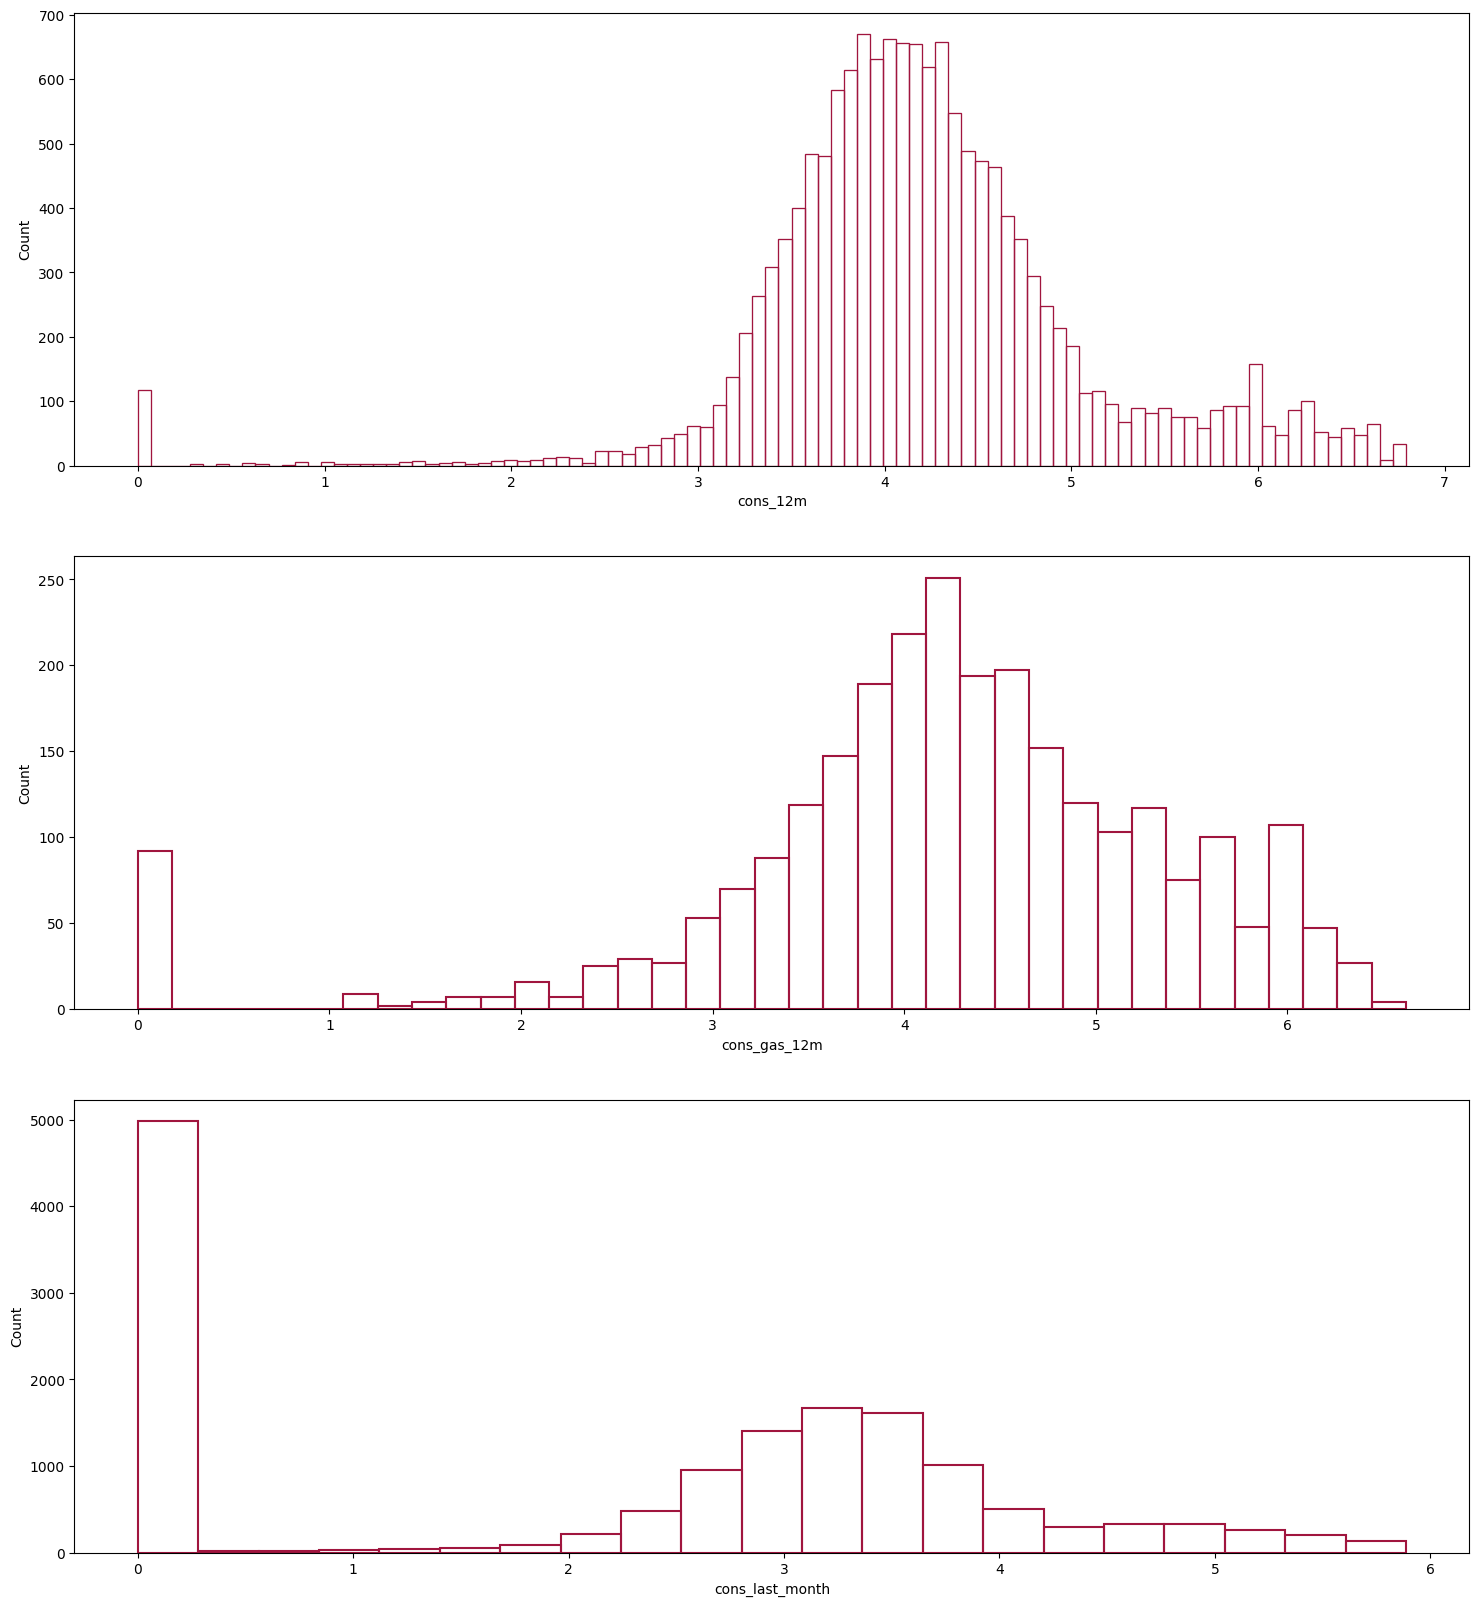

In [217]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.histplot((newdf["cons_12m"].dropna()), ax=axs[0], fill=False, color= '#A0153E')
sns.histplot((newdf[newdf["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1],fill=False, color='#A0153E')
sns.histplot((newdf["cons_last_month"].dropna()), ax=axs[2], fill=False, color='#A0153E')
plt.show()

---

## 4. Correlation Analysis

In terms of creating new features and transforming existing ones, it is very much a trial and error situation that requires iteration. Once we train a predictive model we can see which features work and don't work, we will also know how predictive this set of features is. Based on this, we can come back to feature engineering to enhance our model. 

For now, we will leave feature engineering at this point. Another thing that is always useful to look at is how correlated all of the features are within your dataset.

This is important because it reveals the linear relationships between features. We want features to correlate with `churn`, as this will indicate that they are good predictors of it. However features that have a very high correlation can sometimes be suspicious. This is because 2 columns that have high correlation indicates that they may share a lot of the same information. One of the assumptions of any parametric predictive model (as stated earlier) is that all features must be independent.

For features to be independent, this means that each feature must have absolutely no dependence on any other feature. If two features are highly correlated and share similar information, this breaks this assumption. 

Ideally, you want a set of features that have 0 correlation with all of the independent variables (all features except our target variable) and a high correlation with the target variable (churn). However, this is very rarely the case and it is common to have a small degree of correlation between independent features.

So now let's look at how all the features within the model are correlated.

In [218]:
# Choose only numeric columns
numeric_columns = newdf.select_dtypes(include=[np.number]).columns.tolist()

numeric_columns

['cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_off_peak',
 'forecast_price_energy_peak',
 'forecast_price_pow_off_peak',
 'has_gas',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'nb_prod_act',
 'net_margin',
 'num_years_antig',
 'pow_max',
 'var_year_price_off_peak_var',
 'var_year_price_peak_var',
 'var_year_price_mid_peak_var',
 'var_year_price_off_peak_fix',
 'var_year_price_peak_fix',
 'var_year_price_mid_peak_fix',
 'var_year_price_off_peak',
 'var_year_price_peak',
 'var_year_price_mid_peak',
 'var_6m_price_off_peak_var',
 'var_6m_price_peak_var',
 'var_6m_price_mid_peak_var',
 'var_6m_price_off_peak_fix',
 'var_6m_price_peak_fix',
 'var_6m_price_mid_peak_fix',
 'var_6m_price_off_peak',
 'var_6m_price_peak',
 'var_6m_price_mid_peak',
 'churn',
 'diff_off_peak_dec_jan_energy',
 'diff_off_peak_dec_jan_power',
 'diff_peak_dec_jan_energy',


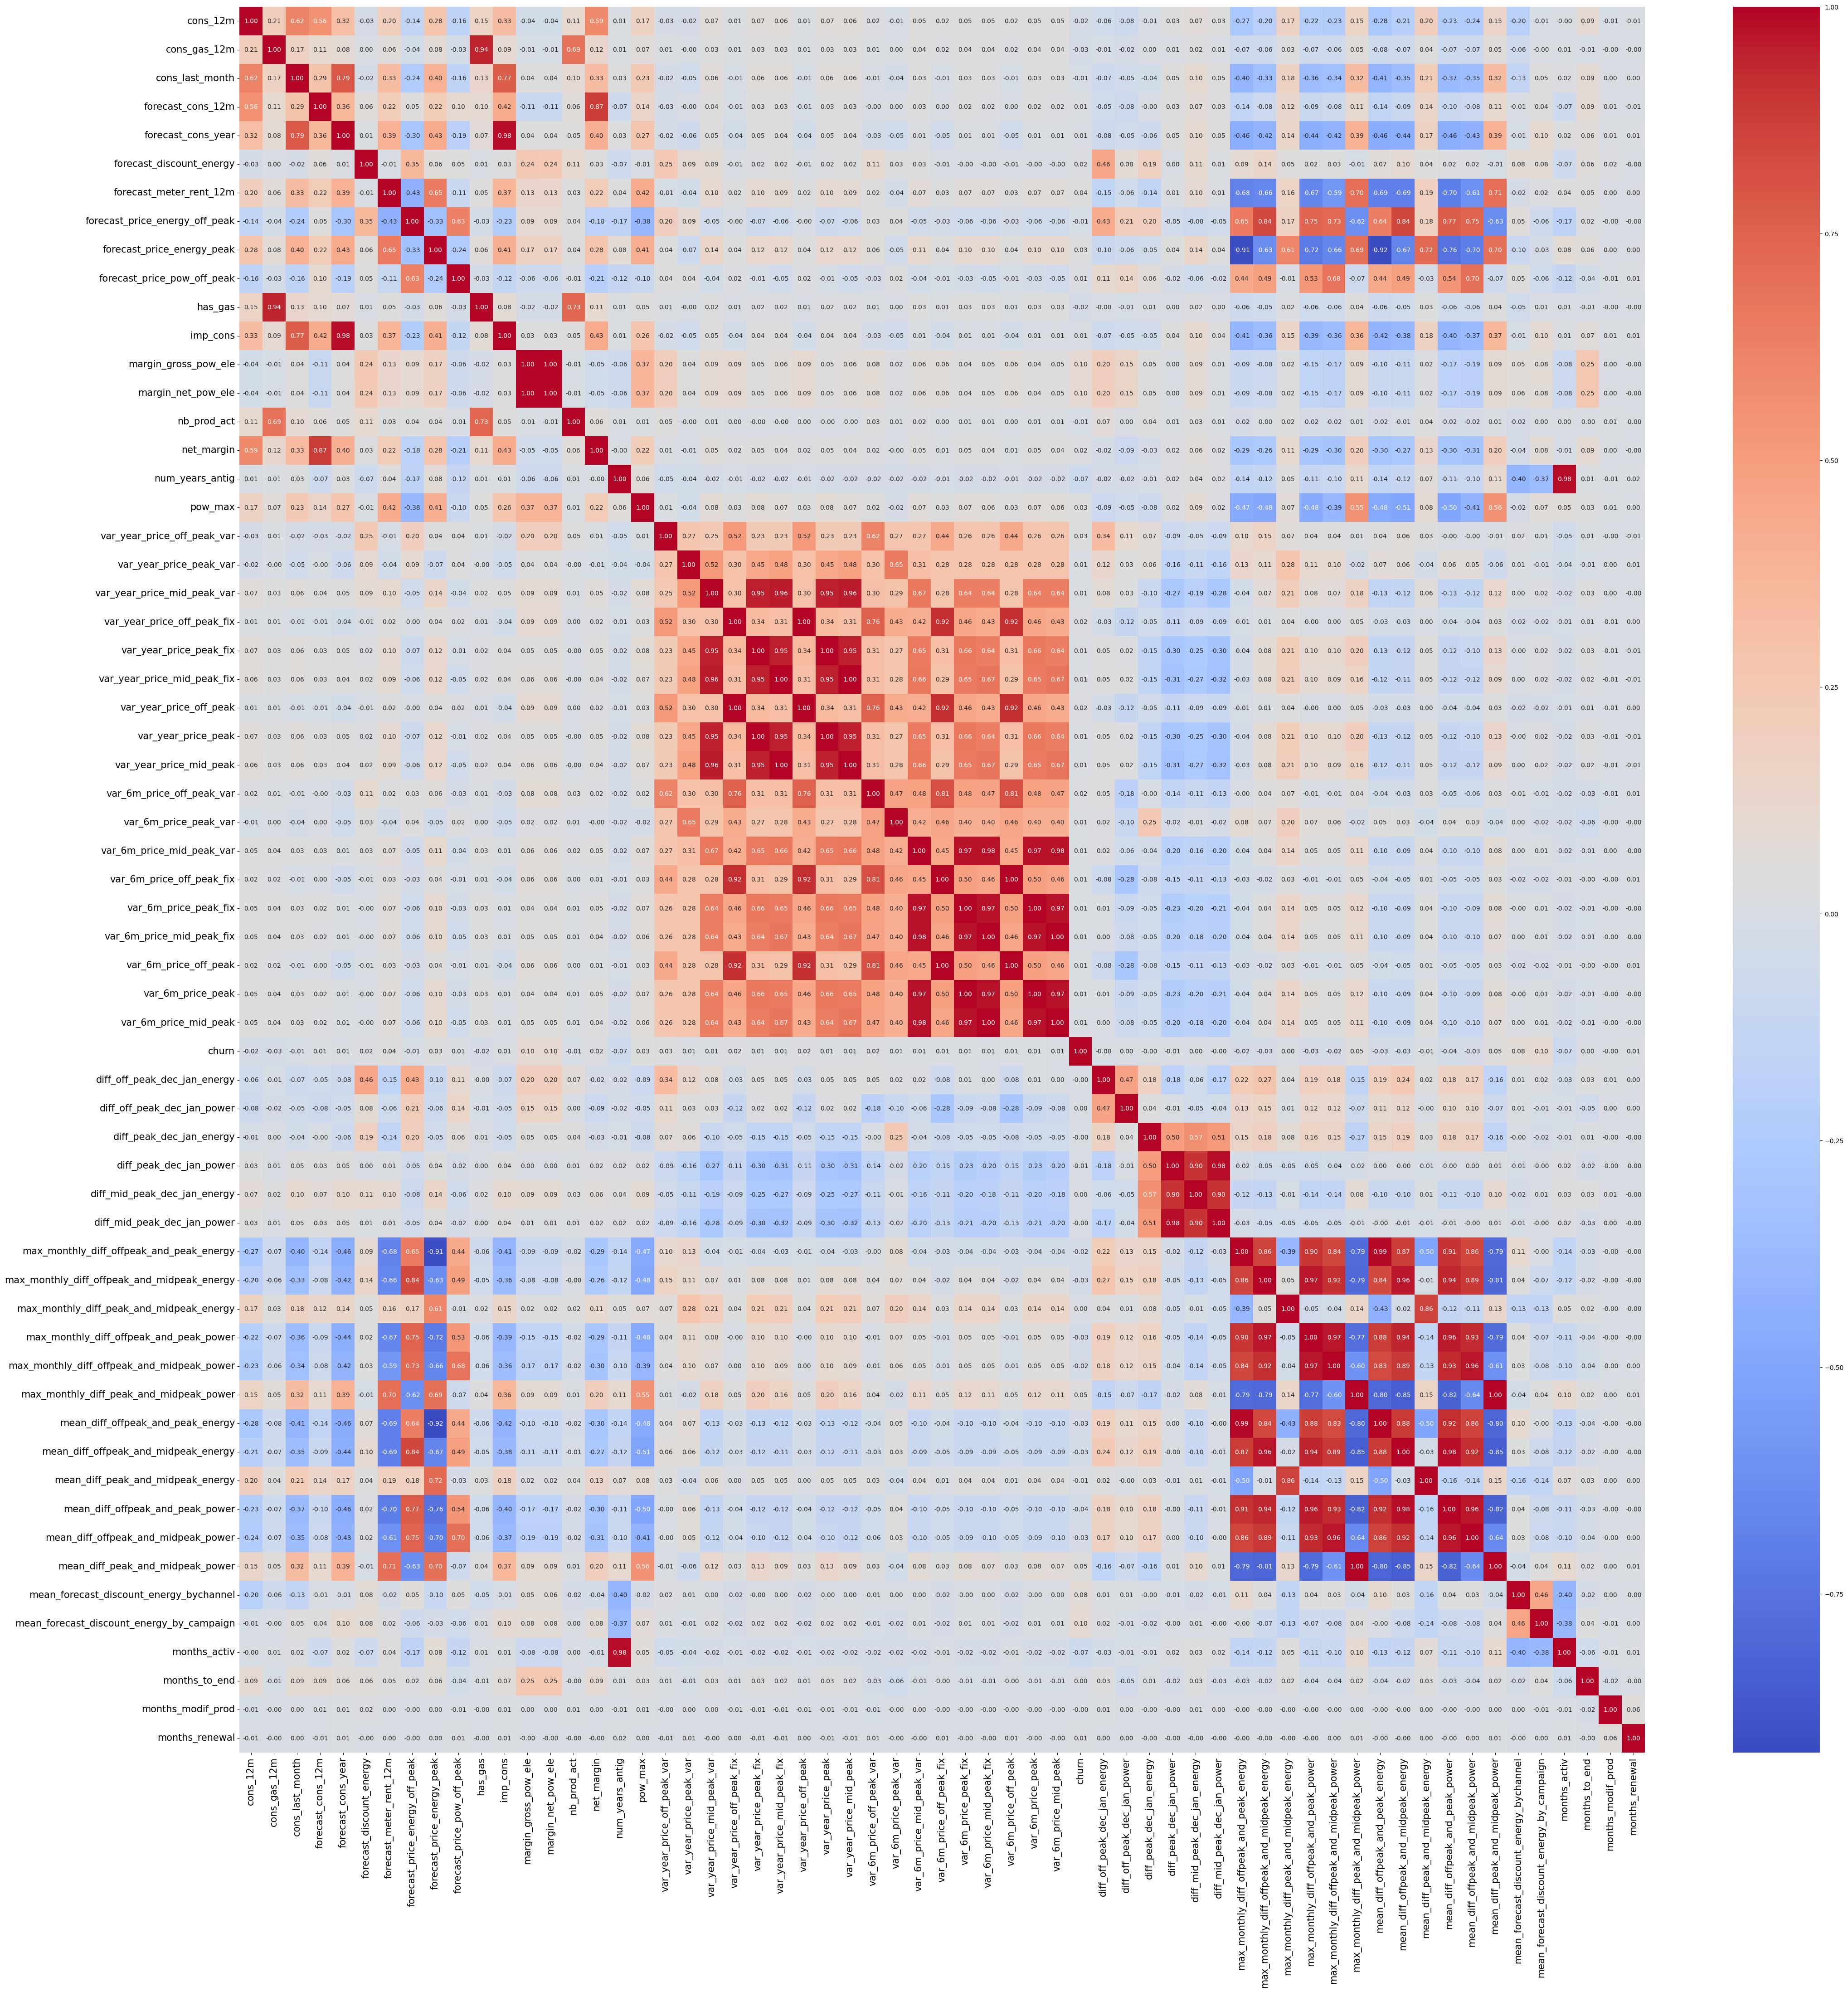

In [219]:
# Heatmap
plt.figure(figsize=(50,50))

sns.heatmap(newdf[numeric_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [220]:
# Remove variables with high correlation with other independent variables